In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'train.csv']


In [3]:
train_source = pd.read_csv('../input/train.csv')
test_source = pd.read_csv('../input/test.csv')

train = train_souce
test = test_source

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [6]:
train[:10]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [7]:
test[:10]

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...
5,7000005,Why can't the Globe & Mail provide the symbols...
6,7000006,"That's already been happening, Carl, it's call..."
7,7000007,"imagine the costs for security, transportation..."
8,7000008,So they want to put United on the board of thi...
9,7000009,"No, no that can't be. It's Russia that's the ..."


In [31]:
test_percent = len(test)/len(train)
train_toxic =(train['target'].values > 0.5).astype(bool).astype(np.int)
train['toxic'] = train_toxic
toxic_comment_distribution = train_toxic.sum()/len(train_toxic)

In [15]:
print("The train set contains {} number of samples".format(len(train)))
print("The test set contains {} number of samples".format(len(test)))
print("The test set is {0:1f}% of the training set".format(test_percent * 100))
print("The test set contains {} toxic comment".format(train_toxic.sum()))
print("Toxic comments are {}% of the total comments".format(toxic_comment_distribution * 100))


The train set contains 1804874 number of samples
The test set contains 97320 number of samples
The test set is 5.392066% of the training set
The test set contains 106438 toxic comment
Toxic comments are 5.8972537695152125% of the total comments


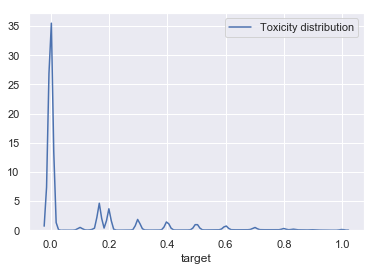

In [21]:
sns.distplot(train['target'], hist=False, kde=True, label="Toxicity distribution")

In [28]:
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']


# train[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int)

train[identity_columns] = train[identity_columns].fillna(0)

In [43]:
def get_toxic_stats_per_identity(train, col):

    is_rel = train[col] > 0.0
    rel_records = train[is_rel]
    toxic_count = rel_records['toxic'].sum()
    toxic_percent = toxic_count/len(rel_records)
    print("The percentage of toxic comments for identity {} is {}%".format(col, toxic_percent * 100))
    return(col, toxic_count, len(rel_records))
    

In [44]:
for col in identity_columns:
    get_toxic_stats_per_identity(train, col)

The percentage of toxic comments for identity male is 10.331882413100688%
The percentage of toxic comments for identity female is 9.791016420138417%
The percentage of toxic comments for identity homosexual_gay_or_lesbian is 17.06408832560267%
The percentage of toxic comments for identity christian is 5.570404172099088%
The percentage of toxic comments for identity jewish is 9.426868408986703%
The percentage of toxic comments for identity muslim is 14.000000000000002%
The percentage of toxic comments for identity black is 19.143280682921844%
The percentage of toxic comments for identity white is 17.864298116735675%
The percentage of toxic comments for identity psychiatric_or_mental_illness is 16.896390060947024%
